<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN409_GenAI_67_2/blob/main/CN409_Google_Gemini_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gemini Demo

- Materials are based on https://github.com/https-deeplearning-ai/sc-gc-c4-gemini-public

In [ ]:
%pip install --upgrade --quiet google-genai

In [ ]:
!gcloud auth application-default login

In [ ]:
!gcloud auth application-default set-quota-project cn409-genai-672 # replace the last one with your project ID

In [75]:
import os
import base64
import vertexai
import IPython
from google import genai
from vertexai.generative_models import GenerativeModel, Part, Image

PROJECT_ID = "cn409-genai-672"
LOCATION = "us-central1"
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [76]:
def generate(prompt):
    model = GenerativeModel("gemini-2.0-flash-001")
    responses = model.generate_content(
        prompt,
        generation_config={ "max_output_tokens": 8192,
                            "temperature": 0}
    )
    return responses.text

generate("Hello Test")

'Hello! How can I help you today?\n'

In [77]:
model = GenerativeModel("gemini-2.0-flash-001")

## Streaming output

- `stream=True` processes the response as it being generated.
- With `stream=False`, you have to wait until the entire response has been generated before it can be proccessed and printed.

In [78]:
response_1 = model.generate_content("Hello Test", stream=True)

In [79]:
response_1

<generator object _GenerativeModel._generate_content_streaming at 0x7dc3f4867c40>

In [ ]:
for response in response_1:
    print(response)

In [ ]:
response_1 = model.generate_content("Hello, can you tell me more about yourself?", stream=True)
for response in response_1:
  print(response.text, end='')

## Multimodality: Image + Text


- Load a prompt and an image

In [ ]:
# We will be using images from Claude again just for comparison
!git clone https://github.com/anthropics/anthropic-cookbook.git

In [ ]:
image = Image.load_from_file("/content/anthropic-cookbook/images/sunset.jpeg")
display(image)

In [ ]:
prompt = "Please describe what is in this image?"
full_prompt = [image, prompt]
response = model.generate_content(
    full_prompt
)

print(response.text)

In [ ]:
generate(full_prompt)

## Multimodality: Video + Text

- Load a video and a prompt.
- Got the video from the dl.ai github

In [27]:
file_path = "dlai-sc-gemini-bucket/pixel8.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

In [29]:
IPython.display.Video(video_url, width=450)

In [30]:
prompt = """Answer the following questions using the video only:
 - What is the main person's profession?
 - What are the main features of the phone highlighted?
 - Which city was this recorded in?
"""

In [31]:
video = Part.from_uri(video_uri, mime_type="video/mp4")
contents_video = [prompt, video]

- The code below will cost a bit too run! Do not run it more than one!!

In [32]:
print(generate(contents_video))

Okay, here are the answers to your questions based on the video:

*   **Profession:** The main person, Saeka Shimada, is a photographer.
*   **Phone Features:** The video highlights the "Video Boost" feature of the new Pixel phone, specifically its "Night Sight" capability, which enhances image quality in low-light conditions.
*   **City:** The video was recorded in Tokyo, Japan.


## Transcribe Youtube Video with Gemini

- Youtube link works too!
- Fireship video on Sonnet 3.7: https://www.youtube.com/watch?v=x2WtHZciC74

In [ ]:
prompt = "Please transcript the video with time stamp and then summarize the video and put in <summary> tags."
video = Part.from_uri("https://www.youtube.com/watch?v=x2WtHZciC74",mime_type='video/mp4')
contents_video = [prompt, video]
print(generate(contents_video))

## Creating use cases with images
- We will go through a few examples of using Gemini

In [ ]:
# First let download their images
!git clone https://github.com/https-deeplearning-ai/sc-gc-c4-gemini-public.git

### Calcualte price

In [ ]:
fruit = Image.load_from_file("/content/sc-gc-c4-gemini-public/lesson-4/bowl-fruits.jpg")
display(fruit)

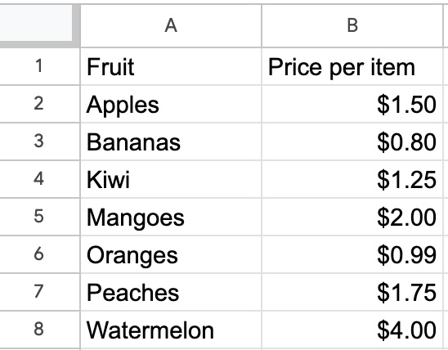

In [87]:
prices = Image.load_from_file("/content/sc-gc-c4-gemini-public/lesson-4/price-list-fruits.jpg")
display(prices)

- We will create a prompt consisting of text and images in a sequence.

In [88]:
instruction_1 = """
I want to make a fruit salad with three bananas, two apples, \
one kiwi, and one orange. This is an image of my bowl of fruits:
"""

instruction_2 = "This is the price list for fruits at my supermarket:"

question = """
Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on the image?
- Given the fruits in my bowl on the image and the fruit salad recipe, what am I missing?
- Given the fruits I still need to buy, what would be the prices and total cost for these fruits?
"""

contents = [
    instruction_1,
    fruit,
    instruction_2,
    prices,
    question
]

In [89]:
print(generate(contents))

Okay, let's break down your fruit salad situation:

**1. Fruits in your bowl:**

Based on the image, you have:

*   Bananas: 3
*   Apples: 2

**2. Missing Fruits:**

You want to make a fruit salad with:

*   3 Bananas
*   2 Apples
*   1 Kiwi
*   1 Orange

Comparing this to what you have in the bowl, you are missing:

*   1 Kiwi
*   1 Orange

**3. Cost of Missing Fruits:**

Based on the price list:

*   Kiwi: $1.25
*   Orange: $0.99

Total cost for the missing fruits: $1.25 + $0.99 = $2.24

**Therefore, you need to spend $2.24 to buy the missing fruits for your fruit salad.**



### Your very own Interior Designer!
- We want to furniture (chairs) that are suitable to our room.

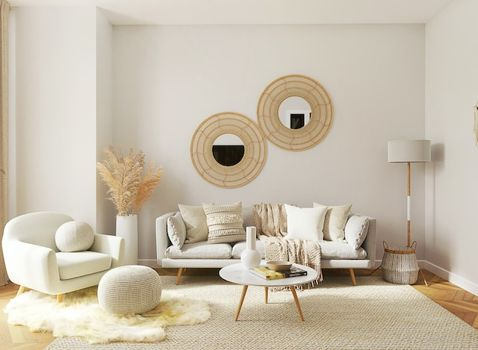

In [90]:
room_image = Image.load_from_file("/content/sc-gc-c4-gemini-public/lesson-4/room.jpg")
display(room_image)

In [91]:
furniture_images_uri = [
    "/content/sc-gc-c4-gemini-public/lesson-4/chair-1.jpg",
    "/content/sc-gc-c4-gemini-public/lesson-4/chair-2.jpg",
    "/content/sc-gc-c4-gemini-public/lesson-4/chair-3.jpg",
    "/content/sc-gc-c4-gemini-public/lesson-4/chair-4.jpg",
]
furniture_images = [Image.load_from_file(uri)
                    for uri in furniture_images_uri]

In [ ]:
for img in furniture_images:
  display(img)

In [ ]:
# Our prompt
recommendation_content = [
    "You are an interior designer.",
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "For each chair, \
explain whether it would be appropriate for the \
style of the room:",
]

In [ ]:
print(generate(recommendation_content))

### Request Business Expense Reimbursement

In [ ]:
receipt_images_uri = [
    '/content/sc-gc-c4-gemini-public/lesson-4/breakfast.jpg',
    '/content/sc-gc-c4-gemini-public/lesson-4/lunch.jpg',
    '/content/sc-gc-c4-gemini-public/lesson-4/diner.jpg',
    '/content/sc-gc-c4-gemini-public/lesson-4/meal-others.jpg',
]
receipt_images = [Image.load_from_file(uri)
                  for uri in receipt_images_uri]

In [ ]:
for img in receipt_images:
  display(img)

In [ ]:
INSTRUCTION = "Never make up facts, and if you are not 100% sure, \
be transparent in stating when you are not sure, or do not \
have enough information to answer certain questions or \
fulfill certain requests."

ROLE = "You are an HR professional and an expert in travel expenses."

ASSIGNMENT = """
You are reviewing travel expenses for a business trip.
Please complete the following tasks:
1. Itemize everything on the receipts, including tax and \
total.  This means identifying the cost of individual \
items that add up to the total cost before tax, as well \
as the tax ,such as sales tax, as well as tip.
2. What is the total sales tax paid?  In some cases, \
the total sales tax may be a sum of more than one line \
item of the receipt.
3. For this particular receipt, the employee who is \
adding this business expense purchased the meal with \
a group. The employee only ordered the KFC Bowl. Please \
provide the cost of the employee's order only.  Include \
both the cost before tax, and also estimate the tax \
that is applied to this employee's order.  To do this,\
calculate the fraction of the employee's pre-tax order\
divided by the total pre-tax cost.  This fraction can be \
applied to the total sales tax that you calculated earlier.
4.  Please calculate the amount spent by others, which \
are all the other line items on the receipt.  Please \
provide this sum before tax, and if possible, apply the \
tax for the total cost.
5. Check the expenses against company policy and flag \
if there are issues.
"""

In [ ]:
with open("/content/sc-gc-c4-gemini-public/lesson-4/travel-policy.txt", "r") as file:
    policy = file.read()

In [ ]:
print(policy)

In [ ]:
receipt_content = [
    INSTRUCTION,
    ROLE,
    "Answer the questions based on the following receipts:"
    "breakfast:",
    receipt_images[0],
    "lunch:",
    receipt_images[1],
    "diner",
    receipt_images[2],
    "meal-others",
    receipt_images[3],
    ASSIGNMENT,
    policy,
]

In [ ]:
print(generate(receipt_content))

### Web scraping

- Example from https://developers.googleblog.com/en/7-examples-of-geminis-multimodal-capabilities-in-action/

In [ ]:
!wget https://storage.googleapis.com/gweb-developer-goog-blog-assets/images/5.original_ourdK4C.png

In [ ]:
webpage = Image.load_from_file("5.original_ourdK4C.png")
display(webpage)

In [42]:
prompt = """Extract each of the books from this webpage, and return a list of JSON objects, where each contains

name of the book
author
number of stars
price
Only output information that you see in the webpage
"""
webpage_content = [webpage, prompt]
print(generate(webpage_content))

```json
[
  {
    "name": "Warriors: A Starless Clan #6:...",
    "author": "Erin Hunter",
    "number of stars": null,
    "price": "$14.95"
  },
  {
    "name": "In Too Deep: A Reacher Novel",
    "author": "Lee Child",
    "number of stars": "4.7",
    "price": "$16.95"
  },
  {
    "name": "The Waiting: A Ballard and Bosch Novel",
    "author": "Michael Connelly",
    "number of stars": "4.8",
    "price": "$16.95"
  },
  {
    "name": "The Fury of the Gods",
    "author": "John Gwynne",
    "number of stars": "5.0",
    "price": "$29.95"
  },
  {
    "name": "Raised by Wolves: Patterson's Greatest Small-Town Thriller...",
    "author": "Emily Raymond",
    "number of stars": null,
    "price": "$14.95"
  },
  {
    "name": "Iron Flame (1 of 2)...",
    "author": "Rebecca Yarros",
    "number of stars": "4.6",
    "price": "$27.95"
  },
  {
    "name": "The Message",
    "author": "Ta-Nehisi Coates",
    "number of stars": "4.9",
    "price": "$14.95"
  },
  {
    "name": "Revenge 

### Drawing bounding-box
- Example from https://colab.research.google.com/drive/1eDvf_Ky9jLOZFShgHrm4GI-wkAaQnue6?usp=sharing#scrollTo=9tWmY-3QipvK

**BOX CONVENTION**

- The box convention that we follow is [ymin, xmin, ymax, xmax], where the y co-ordinate denotes the vertical direction and x co-ordinate is in the horizontal direction. The boxes are always predicted in normalized co-ordinates, with the values scaled to be between [0, 1000].

In [ ]:
!wget http://images.cocodataset.org/val2017/000000281759.jpg

In [ ]:
box_im = Image.load_from_file("000000281759.jpg")
display(box_im)

In [ ]:
response = model.generate_content([
    box_im,
    "Return bounding boxes for all the umbrellas in the following format as a list. \n [ymin, xmin, ymax, xmax]"
])
print(response.text)

Plotting bounding boxes

In [94]:
# @title Utils for parsing and ploting boxes
import PIL
import re
import json

additional_colors = [colorname for (colorname, colorcode) in PIL.ImageColor.colormap.items()]


def plot_bounding_boxes(im, noun_phrases_and_positions):
    """
    Plots bounding boxes on an image with markers for each noun phrase, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        noun_phrases_and_positions: A list of tuples containing the noun phrases
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = PIL.ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # Iterate over the noun phrases and their positions
    for i, (noun_phrase, (y1, x1, y2, x2)) in enumerate(
        noun_phrases_and_positions):
        # Select a color from the list
        color = colors[i % len(colors)]

        # Convert normalized coordinates to absolute coordinates
        abs_x1 = int(x1/1000 * width)
        abs_y1 = int(y1/1000 * height)
        abs_x2 = int(x2/1000 * width)
        abs_y2 = int(y2/1000 * height)

        # Draw the bounding box
        draw.rectangle(
            ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
        )

        # Draw the text
        draw.text((abs_x1 + 8, abs_y1 + 6), noun_phrase, fill=color)

    # Display the image
    img.show()

def extract_coordinates(text):
    # Find the JSON part within the text (everything between ``` and ```)
    json_match = re.search(r'```json\s*(.*?)\s*```', text, re.DOTALL)
    if not json_match:
        return []

    json_str = json_match.group(1)

    try:
        # Parse the JSON data
        data = json.loads(json_str)

        # Extract the coordinates from each item's box_2d field
        coordinates = [item["box_2d"] for item in data]

        return coordinates
    except json.JSONDecodeError:
        return []
    except KeyError:
        return []

In [ ]:
boxes = extract_coordinates(response.text)
im = PIL.Image.open('000000281759.jpg')
boxes = {f'umbrella_{i}': x for i, x in enumerate(boxes)}
plot_bounding_boxes(im, noun_phrases_and_positions=list(boxes.items()))
im

## Video use cases

### Digital Marketer

In [61]:
file_path_1 = "dlai-sc-gemini-bucket/vertex-ai-langchain.mp4"
video_uri_1 = f"gs://{file_path_1}"
video_url_1 = f"https://storage.googleapis.com/{file_path_1}"

In [ ]:
IPython.display.Video(video_url_1, width=450)

In [ ]:
video_1 = Part.from_uri(video_uri_1, mime_type="video/mp4")

#### Prompting Video
- Structure your prompt(s).
- Be specific with what you want the model to do for you.
- Specify the output format of the response from the model.

In [ ]:
role = """
You are a great digital marketer working on a new video.
"""
tasks = """
You will add the video to your website and to do this you
need to complete some tasks. Please make sure your answer
is structured.

Tasks:
- What is the title of the video?
- Write a summary of what is in the video.
- Generate metadata for the video in JSON that includes:\
Title, short description, language, and company.
"""
format_json = "Please output the metadata in JSON"

In [ ]:
contents_1 = [video_1, role, tasks]
# contents_1 = [video_1, role, tasks, format_json]

- Running the cell below may take some time and money

In [ ]:
print(generate(contents_1))

### Explaining the Educational Concepts

In [ ]:
file_path_2 = "dlai-sc-gemini-bucket/descending-into-ml.mp4"
video_uri_2 = f"gs://{file_path_2}"
video_url_2 = f"https://storage.googleapis.com/{file_path_2}"

IPython.display.Video(video_url_2, width=450)

In [ ]:
video_2 = Part.from_uri(video_uri_2, mime_type="video/mp4")

- You can even ask the model to answer based on answers of previous questions.
- And to generate programming code based on previous answers.

In [ ]:
prompt = """
Please have a look at the video and answer the following
questions.

Questions:
- Question 1: Which concept is explained in the video?
- Question 2: Based on your answer to Question 1,
can you explain the basic math of this concept?
- Question 3: Can you provide a simple scikit code example
explaining the concept?
"""

In [ ]:
contents_2 = [video_2, prompt]
print(generate(contents_2))

### Extracting Information


In [ ]:
file_path_3 = "dlai-sc-gemini-bucket/google-search.mp4"
video_uri_3 = f"gs://{file_path_3}"
video_url_3 = f"https://storage.googleapis.com/{file_path_3}"

IPython.display.Video(video_url_3, width=450)

In [ ]:
video_ext = Part.from_uri(video_uri_3, mime_type="video/mp4")

In [ ]:
prompt_ext = """
Answer the following questions using the video only.
Present the results in a table with a row for each question
and its answer.
Make sure the table is in markdown format.

Questions:
- What is the most searched sport?
- Who is the most searched scientist?

Format:
- Present the results in a table with a row for each question and its answer.
- Make sure the table is in markdown format.
"""
contents_ext = [video_ext, prompt_ext]

In [ ]:
print(generate(contents_ext))

### Extracting recipe

- Video https://www.youtube.com/watch?v=9biIOtEYeHc

In [ ]:
prompt = "Please extract recipe and how to cook from the video."
video = Part.from_uri("https://www.youtube.com/watch?v=9biIOtEYeHc",mime_type='video/mp4')
contents_video = [prompt, video]
print(generate(contents_video))